# Fetching data from Deezer API

In [118]:
!pip install retryable

In [119]:
import requests
import pandas as pd
from time import sleep
from retryable import retry

## Fetching artists
Docs: https://developers.deezer.com/api/artist

In [120]:
@retry()
def get_artist_data(artist_id):
    url = "https://api.deezer.com/artist/" + str(artist_id)
    response = requests.get(url).json()
    if response.get('error') and response['error'].get('message') == 'no data':
        return(None)
    return(response)

get_artist_data(1)

{u'id': 1,
 u'link': u'https://www.deezer.com/artist/1',
 u'name': u'The Beatles',
 u'nb_album': 38,
 u'nb_fan': 5096481,
 u'picture': u'https://api.deezer.com/artist/1/image',
 u'picture_big': u'https://e-cdns-images.dzcdn.net/images/artist/e7f8aad6226980723164ee42e171bd17/500x500-000000-80-0-0.jpg',
 u'picture_medium': u'https://e-cdns-images.dzcdn.net/images/artist/e7f8aad6226980723164ee42e171bd17/250x250-000000-80-0-0.jpg',
 u'picture_small': u'https://e-cdns-images.dzcdn.net/images/artist/e7f8aad6226980723164ee42e171bd17/56x56-000000-80-0-0.jpg',
 u'picture_xl': u'https://e-cdns-images.dzcdn.net/images/artist/e7f8aad6226980723164ee42e171bd17/1000x1000-000000-80-0-0.jpg',
 u'radio': True,
 u'share': u'https://www.deezer.com/artist/1?utm_source=deezer&utm_content=artist-1&utm_term=0_1558800378&utm_medium=web',
 u'tracklist': u'https://api.deezer.com/artist/1/top?limit=50',
 u'type': u'artist'}

In [121]:
orders = [
    0,
#     1000,
    10000,
    100000,
    1000000
]
n_per_order = 10000
artist_ids = []
for order in orders:
    artist_ids += range(order, order + n_per_order)
len(artist_ids)

40000

In [122]:
data = []

In [123]:
for artist_id in artist_ids:
    data.append(get_artist_data(artist_id))
    if len(data) % 10 == 0:
        print(len(data))

10
20
30
40
50
60
70


KeyboardInterrupt: 

In [ ]:
len(data)

In [ ]:
data[-1]

In [ ]:
data = [e for e in data if e]
len(data)

In [ ]:
df = pd.DataFrame(data)
df.head()

In [ ]:
df = df.set_index('id')
df.head()

In [ ]:
df.to_csv('artists_all.csv', encoding='utf-8')

# Filtering artists

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline

In [155]:
df = pd.read_csv('artists_all.csv')
df.head()

,Unnamed: 0,id,link,name,nb_album,nb_fan,picture,picture_big,picture_medium,picture_small,picture_xl,radio,share,tracklist,type
0,0,1,https://www.deezer.com/artist/1,The Beatles,36,5094468,https://api.deezer.com/artist/1/image,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,True,https://www.deezer.com/artist/1?utm_source=dee...,https://api.deezer.com/artist/1/top?limit=50,artist
1,1,2,https://www.deezer.com/artist/2,The Clash,10,989493,https://api.deezer.com/artist/2/image,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,True,https://www.deezer.com/artist/2?utm_source=dee...,https://api.deezer.com/artist/2/top?limit=50,artist
2,2,3,https://www.deezer.com/artist/3,Snoop Dogg,129,5960471,https://api.deezer.com/artist/3/image,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,True,https://www.deezer.com/artist/3?utm_source=dee...,https://api.deezer.com/artist/3/top?limit=50,artist
3,3,4,https://www.deezer.com/artist/4,America,48,26416,https://api.deezer.com/artist/4/image,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,https://e-cdns-images.dzcdn.net/images/artist/...,False,https://www.deezer.com/artist/4?utm_source=dee...,https://api.deezer.com/artist/4/top?limit=50,artist
4,4,5,https://www.deezer.com/artist/5,Amadou & Mariam,26,69209,https://api.deezer.com/artist/5/image,https://cdns-images.dzcdn.net/images/artist/11...,https://cdns-images.dzcdn.net/images/artist/11...,https://cdns-images.dzcdn.net/images/artist/11...,https://cdns-images.dzcdn.net/images/artist/11...,True,https://www.deezer.com/artist/5?utm_source=dee...,https://api.deezer.com/artist/5/top?limit=50,artist


In [156]:
df.shape

(19777, 15)

In [157]:
df = df[df['nb_album'] > 1]
df.shape[0]

11106

In [158]:
for i in [100, 1000, 10000, 100000]:
    print(i, df[df['nb_fan'] > i].shape[0])

(100, 8067)
(1000, 5589)
(10000, 2807)
(100000, 947)


In [159]:
df = df[df['nb_fan'] > 1000]
df.shape[0]

5589

(array([1.724e+03, 1.450e+03, 9.360e+02, 4.530e+02, 2.950e+02, 1.660e+02,
        1.180e+02, 7.000e+01, 5.200e+01, 4.200e+01, 3.500e+01, 1.900e+01,
        2.400e+01, 1.800e+01, 9.000e+00, 1.100e+01, 1.000e+01, 9.000e+00,
        7.000e+00, 8.000e+00, 5.000e+00, 6.000e+00, 5.000e+00, 5.000e+00,
        2.000e+00, 4.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 4.000e+00, 4.000e+00, 3.000e+00,
        7.000e+00, 1.000e+00, 5.000e+00, 2.000e+00, 5.000e+00, 4.000e+00,
        7.000e+00, 8.000e+00, 1.100e+01, 4.000e+00, 7.000e+00, 5.000e+00,
        3.000e+00, 5.000e+00]),
 array([  2.  ,  11.86,  21.72,  31.58,  41.44,  51.3 ,  61.16,  71.02,
         80.88,  90.74, 100.6 , 110.46, 120.32, 130.18, 140.04, 149.9 ,
        159.76, 169.62, 179.48, 189.34, 199.2 , 209.06, 218.92, 228.78,
        238.64, 248.5 , 258.36, 268.22, 278.08, 287.94, 297.8 , 307.66,
        317.52, 327.38, 337.24, 347.1 , 356.96, 366.82, 376.68, 386.54,
        396.4 , 

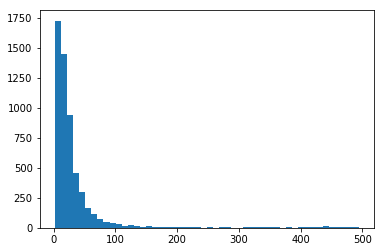

In [160]:
plt.hist(df['nb_album'].values, bins=50)

In [161]:
for i in [50, 100]:
    print(i, df[df['nb_album'] < i].shape[0])


(50, 4812)
(100, 5303)


In [162]:
df = df[df['nb_album'] < 100]
df.shape[0]

5303

(array([292., 357., 328., 369., 378., 364., 306., 279., 253., 248., 219.,
        208., 200., 155., 154., 101.,  53.,  94.,  87.,  83.,  73.,  78.,
         60.,  59.,  30.,  57.,  27.,  37.,  27.,  29.,  34.,  28.,  27.,
          6.,  26.,  16.,  16.,  20.,  16.,  12.,  12.,  11.,  18.,   8.,
          6.,   9.,   9.,   8.,  10.,   6.]),
 array([ 2.  ,  3.94,  5.88,  7.82,  9.76, 11.7 , 13.64, 15.58, 17.52,
        19.46, 21.4 , 23.34, 25.28, 27.22, 29.16, 31.1 , 33.04, 34.98,
        36.92, 38.86, 40.8 , 42.74, 44.68, 46.62, 48.56, 50.5 , 52.44,
        54.38, 56.32, 58.26, 60.2 , 62.14, 64.08, 66.02, 67.96, 69.9 ,
        71.84, 73.78, 75.72, 77.66, 79.6 , 81.54, 83.48, 85.42, 87.36,
        89.3 , 91.24, 93.18, 95.12, 97.06, 99.  ]),
 <a list of 50 Patch objects>)

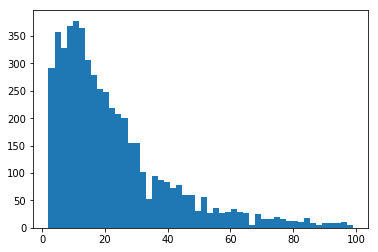

In [163]:
plt.hist(df['nb_album'].values, bins=50)

In [165]:
sampled_df = df.sample(frac=0.5, random_state=0)
sampled_df['nb_album'].sum()

60010

In [166]:
sampled_df.shape

(2652, 15)

(array([140., 173., 177., 171., 180., 175., 146., 156., 145., 121., 111.,
        108., 101.,  73.,  83.,  50.,  28.,  51.,  38.,  45.,  39.,  37.,
         28.,  31.,  13.,  27.,  18.,  17.,  12.,  14.,  12.,  12.,  16.,
          3.,  12.,   8.,   7.,  11.,   6.,   8.,   4.,   3.,  13.,   5.,
          4.,   3.,   3.,   6.,   4.,   4.]),
 array([ 2.  ,  3.94,  5.88,  7.82,  9.76, 11.7 , 13.64, 15.58, 17.52,
        19.46, 21.4 , 23.34, 25.28, 27.22, 29.16, 31.1 , 33.04, 34.98,
        36.92, 38.86, 40.8 , 42.74, 44.68, 46.62, 48.56, 50.5 , 52.44,
        54.38, 56.32, 58.26, 60.2 , 62.14, 64.08, 66.02, 67.96, 69.9 ,
        71.84, 73.78, 75.72, 77.66, 79.6 , 81.54, 83.48, 85.42, 87.36,
        89.3 , 91.24, 93.18, 95.12, 97.06, 99.  ]),
 <a list of 50 Patch objects>)

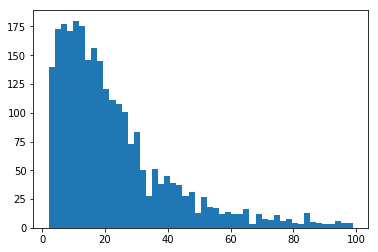

In [167]:
plt.hist(sampled_df['nb_album'].values, bins=50)

In [168]:
sampled_df.describe()

,Unnamed: 0,id,nb_album,nb_fan
count,2652.000000,2.652000e+03,2652.000000,2.652000e+03
mean,4616.323529,2.797908e+04,22.628205,1.359453e+05
std,3688.991238,1.287159e+05,18.339267,5.922630e+05
min,1.000000,2.000000e+00,2.000000,1.002000e+03
25%,1698.500000,1.749500e+03,10.000000,2.994000e+03
50%,3667.500000,3.777500e+03,18.000000,9.671000e+03
75%,7154.000000,1.232600e+04,30.000000,4.420825e+04
max,19585.000000,1.004808e+06,99.000000,1.192608e+07


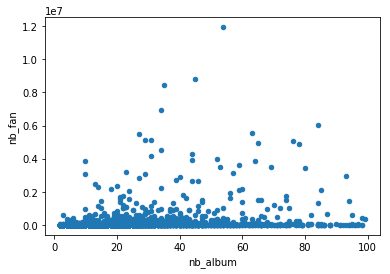

In [169]:
sampled_df.plot(x='nb_album', y='nb_fan', kind='scatter')

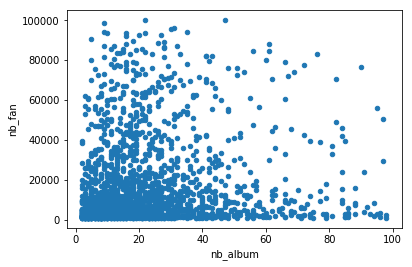

In [170]:
sampled_df[sampled_df['nb_fan'] < 100000].plot(x='nb_album', y='nb_fan', kind='scatter')

In [171]:
sampled_df.to_csv('artists.csv', encoding='utf-8')

## Fetching artists releases
Docs: https://developers.deezer.com/api/artist/albums

In [172]:
@retry()
def get_artist_releases(artist_id):
    all_releases_loaded = False
    url = "https://api.deezer.com/artist/" + str(artist_id) + "/albums"
    releases = []

    while not all_releases_loaded:
        response = requests.get(url).json()
        releases += response['data']
        if response.get('next'):
            url = response['next']
        else:
            all_releases_loaded = True
            
    for release in releases:
        release.update({'artist_id': artist_id})
        
    return(releases)

get_artist_releases(1)[0]

{'artist_id': 1,
 u'cover': u'https://api.deezer.com/album/13994298/image',
 u'cover_big': u'https://e-cdns-images.dzcdn.net/images/cover/2336c346c8526caf652cc01b9363286b/500x500-000000-80-0-0.jpg',
 u'cover_medium': u'https://e-cdns-images.dzcdn.net/images/cover/2336c346c8526caf652cc01b9363286b/250x250-000000-80-0-0.jpg',
 u'cover_small': u'https://e-cdns-images.dzcdn.net/images/cover/2336c346c8526caf652cc01b9363286b/56x56-000000-80-0-0.jpg',
 u'cover_xl': u'https://e-cdns-images.dzcdn.net/images/cover/2336c346c8526caf652cc01b9363286b/1000x1000-000000-80-0-0.jpg',
 u'explicit_lyrics': False,
 u'fans': 16679,
 u'genre_id': 152,
 u'id': 13994298,
 u'link': u'https://www.deezer.com/album/13994298',
 u'record_type': u'album',
 u'release_date': u'2016-09-09',
 u'title': u'Live At The Hollywood Bowl',
 u'tracklist': u'https://api.deezer.com/album/13994298/tracks',
 u'type': u'album'}

In [173]:
artist_ids = list(pd.read_csv('artists.csv')['id'])
artist_ids[:10]

[13011, 1095, 681, 37, 13733, 286, 13072, 11247, 1935, 1782]

In [174]:
len(artist_ids)

2652

In [175]:
data = []

In [176]:
for artist_id in artist_ids:
    data += get_artist_releases(artist_id)
#     if len(data) % 10 == 0:
    print(len(data))
    sleep(0.1)

15
30
45
55
59
88
121
160
255
281
305
311
317
333
340
363
379
385
402
415
452
477
490
508
554
558
586
621
650
661
663
666
682
722
754
762
769
800
828
857
898
957
1028
1055
1058
1102
1130
1134
1150
1155
1158
1168
1194
1221
1248
1277
1300
1335
1342
1355
1373
1381
1422
1430
1436
1451
1455
1458
1481
1502
1514
1539
1548
1560
1571
1584
1588
1627
1649
1681
1694
1699
1768
1783
1790
1795
1827
1863
1897
1909
1923
1928
1952
1979
1983
1987
2003
2019
2046
2056
2070
2097
2139
2156
2177
2201
2208
2223
2232
2298
2375
2378
2436
2457
2468
2471
2484
2528
2532
2556
2566
2609
2615
2641
2650
2656
2660
2685
2739
2770
2790
2803
2823
2842
2852
2854
2913
2934
2943
2958
2968
2987
2995
3025
3054
3065
3091
3140
3167
3190
3241
3246
3258
3280
3309
3314
3323
3326
3347
3379
3421
3457
3465
3492
3520
3525
3530
3541
3544
3567
3589
3593
3610
3620
3634
3646
3672
3702
3737
3746
3758
3777
3800
3831
3844
3868
3885
3888
3930
3942
3968
3985
4002
4026
4044
4050
4062
4117
4136
4140
4146
4149
4163
4169
4176
4191
4207
4212
4228
431

In [177]:
len(data)

60088

In [178]:
df = pd.DataFrame(data)
df.head()

,artist_id,cover,cover_big,cover_medium,cover_small,cover_xl,explicit_lyrics,fans,genre_id,id,link,record_type,release_date,title,tracklist,type
0,13011,https://api.deezer.com/album/77874622/image,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,False,97770,116,77874622,https://www.deezer.com/album/77874622,album,2018-11-09,Phoenix,https://api.deezer.com/album/77874622/tracks,album
1,13011,https://api.deezer.com/album/77130752/image,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,False,19530,116,77130752,https://www.deezer.com/album/77130752,album,2016-10-14,L'Everest (Deluxe Edition),https://api.deezer.com/album/77130752/tracks,album
2,13011,https://api.deezer.com/album/77126682/image,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,True,12707,116,77126682,https://www.deezer.com/album/77126682,album,2015-08-21,Cosmopolitanie (Deluxe Edition),https://api.deezer.com/album/77126682/tracks,album
3,13011,https://api.deezer.com/album/9816130/image,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,False,10390,116,9816130,https://www.deezer.com/album/9816130,album,2015-03-16,Cosmopolitanie (Bonus Tracks),https://api.deezer.com/album/9816130/tracks,album
4,13011,https://api.deezer.com/album/1641895/image,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,False,54487,116,1641895,https://www.deezer.com/album/1641895,album,2012-04-30,E=2MC's,https://api.deezer.com/album/1641895/tracks,album


In [179]:
df = df.set_index('id')
df.head()

,artist_id,cover,cover_big,cover_medium,cover_small,cover_xl,explicit_lyrics,fans,genre_id,link,record_type,release_date,title,tracklist,type
id,,,,,,,,,,,,,,,
77874622,13011,https://api.deezer.com/album/77874622/image,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,False,97770,116,https://www.deezer.com/album/77874622,album,2018-11-09,Phoenix,https://api.deezer.com/album/77874622/tracks,album
77130752,13011,https://api.deezer.com/album/77130752/image,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,False,19530,116,https://www.deezer.com/album/77130752,album,2016-10-14,L'Everest (Deluxe Edition),https://api.deezer.com/album/77130752/tracks,album
77126682,13011,https://api.deezer.com/album/77126682/image,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,True,12707,116,https://www.deezer.com/album/77126682,album,2015-08-21,Cosmopolitanie (Deluxe Edition),https://api.deezer.com/album/77126682/tracks,album
9816130,13011,https://api.deezer.com/album/9816130/image,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,False,10390,116,https://www.deezer.com/album/9816130,album,2015-03-16,Cosmopolitanie (Bonus Tracks),https://api.deezer.com/album/9816130/tracks,album
1641895,13011,https://api.deezer.com/album/1641895/image,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,False,54487,116,https://www.deezer.com/album/1641895,album,2012-04-30,E=2MC's,https://api.deezer.com/album/1641895/tracks,album


In [180]:
df.to_csv('releases_incomplete.csv', encoding='utf-8')

# Fetching more info about releases
Docs: https://developers.deezer.com/api/album

In [181]:
releases = pd.read_csv('releases_incomplete.csv')
releases.head()

,id,artist_id,cover,cover_big,cover_medium,cover_small,cover_xl,explicit_lyrics,fans,genre_id,link,record_type,release_date,title,tracklist,type
0,77874622,13011,https://api.deezer.com/album/77874622/image,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,https://cdns-images.dzcdn.net/images/cover/e66...,False,97770,116,https://www.deezer.com/album/77874622,album,2018-11-09,Phoenix,https://api.deezer.com/album/77874622/tracks,album
1,77130752,13011,https://api.deezer.com/album/77130752/image,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,https://cdns-images.dzcdn.net/images/cover/665...,False,19530,116,https://www.deezer.com/album/77130752,album,2016-10-14,L'Everest (Deluxe Edition),https://api.deezer.com/album/77130752/tracks,album
2,77126682,13011,https://api.deezer.com/album/77126682/image,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,https://cdns-images.dzcdn.net/images/cover/61a...,True,12707,116,https://www.deezer.com/album/77126682,album,2015-08-21,Cosmopolitanie (Deluxe Edition),https://api.deezer.com/album/77126682/tracks,album
3,9816130,13011,https://api.deezer.com/album/9816130/image,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,https://cdns-images.dzcdn.net/images/cover/32a...,False,10390,116,https://www.deezer.com/album/9816130,album,2015-03-16,Cosmopolitanie (Bonus Tracks),https://api.deezer.com/album/9816130/tracks,album
4,1641895,13011,https://api.deezer.com/album/1641895/image,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,https://cdns-images.dzcdn.net/images/cover/f4a...,False,54487,116,https://www.deezer.com/album/1641895,album,2012-04-30,E=2MC's,https://api.deezer.com/album/1641895/tracks,album


In [182]:
release_ids = list(releases['id'])
release_ids[:10]

[77874622,
 77130752,
 77126682,
 9816130,
 1641895,
 1523930,
 40632261,
 301745,
 77133732,
 1252759]

In [183]:
artist_ids = list(releases['artist_id'])
artist_ids[:10]

[13011, 13011, 13011, 13011, 13011, 13011, 13011, 13011, 13011, 13011]

In [184]:
artist_ids_dict = dict(zip(release_ids, artist_ids))

In [185]:
@retry()
def get_release_data(release_id):
    url = "https://api.deezer.com/album/" + str(release_id)
    response = requests.get(url).json()
#     response.update({'artist_id': artist_ids_dict[release_id]})
    return(response)

get_release_data(release_ids[0]).keys()

[u'rating',
 u'contributors',
 u'share',
 u'record_type',
 u'duration',
 u'cover_small',
 u'id',
 u'genres',
 u'title',
 u'explicit_content_cover',
 u'explicit_content_lyrics',
 u'label',
 u'fans',
 u'tracklist',
 u'available',
 u'tracks',
 u'link',
 u'cover_xl',
 u'nb_tracks',
 u'cover_big',
 u'type',
 u'release_date',
 u'artist',
 u'cover',
 u'upc',
 u'explicit_lyrics',
 u'cover_medium',
 u'genre_id']

In [186]:
data = []

In [187]:
for release_id in release_ids:
    data.append(get_release_data(release_id))
#     sleep(0.01)
    if len(data) % 10 == 0:
        print(len(data))

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
222

In [188]:
len(data)

60088

In [189]:
df = pd.DataFrame(data)
df.head()

,artist,available,contributors,cover,cover_big,cover_medium,cover_small,cover_xl,duration,error,...,nb_tracks,rating,record_type,release_date,share,title,tracklist,tracks,type,upc
0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77874622/image,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,3521.0,NaN,...,16.0,0.0,album,2018-11-09,https://www.deezer.com/album/77874622?utm_sour...,Phoenix,https://api.deezer.com/album/77874622/tracks,{u'data': [{u'title_short': u'Intro (Renaissan...,album,190295531218
1,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77130752/image,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,4177.0,NaN,...,18.0,0.0,album,2016-10-14,https://www.deezer.com/album/77130752?utm_sour...,L'Everest (Deluxe Edition),https://api.deezer.com/album/77130752/tracks,"{u'data': [{u'title_short': u'Everest', u'titl...",album,190295518134
2,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77126682/image,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,6054.0,NaN,...,28.0,0.0,album,2015-08-21,https://www.deezer.com/album/77126682?utm_sour...,Cosmopolitanie (Deluxe Edition),https://api.deezer.com/album/77126682/tracks,"{u'data': [{u'title_short': u'Préface', u'titl...",album,190295519391
3,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/9816130/image,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,1753.0,NaN,...,8.0,0.0,album,2015-03-16,https://www.deezer.com/album/9816130?utm_sourc...,Cosmopolitanie (Bonus Tracks),https://api.deezer.com/album/9816130/tracks,"{u'data': [{u'title_short': u'Clown', u'title'...",album,825646119196
4,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/1641895/image,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,3194.0,NaN,...,12.0,0.0,album,2012-04-30,https://www.deezer.com/album/1641895?utm_sourc...,E=2MC's,https://api.deezer.com/album/1641895/tracks,"{u'data': [{u'title_short': u'Le labo', u'titl...",album,5099962301350


In [190]:
df = df.set_index('id')
df.head()

,artist,available,contributors,cover,cover_big,cover_medium,cover_small,cover_xl,duration,error,...,nb_tracks,rating,record_type,release_date,share,title,tracklist,tracks,type,upc
id,,,,,,,,,,,,,,,,,,,,,
77874622.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77874622/image,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,https://e-cdns-images.dzcdn.net/images/cover/e...,3521.0,NaN,...,16.0,0.0,album,2018-11-09,https://www.deezer.com/album/77874622?utm_sour...,Phoenix,https://api.deezer.com/album/77874622/tracks,{u'data': [{u'title_short': u'Intro (Renaissan...,album,190295531218
77130752.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77130752/image,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,4177.0,NaN,...,18.0,0.0,album,2016-10-14,https://www.deezer.com/album/77130752?utm_sour...,L'Everest (Deluxe Edition),https://api.deezer.com/album/77130752/tracks,"{u'data': [{u'title_short': u'Everest', u'titl...",album,190295518134
77126682.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/77126682/image,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,https://e-cdns-images.dzcdn.net/images/cover/6...,6054.0,NaN,...,28.0,0.0,album,2015-08-21,https://www.deezer.com/album/77126682?utm_sour...,Cosmopolitanie (Deluxe Edition),https://api.deezer.com/album/77126682/tracks,"{u'data': [{u'title_short': u'Préface', u'titl...",album,190295519391
9816130.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/9816130/image,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,https://e-cdns-images.dzcdn.net/images/cover/3...,1753.0,NaN,...,8.0,0.0,album,2015-03-16,https://www.deezer.com/album/9816130?utm_sourc...,Cosmopolitanie (Bonus Tracks),https://api.deezer.com/album/9816130/tracks,"{u'data': [{u'title_short': u'Clown', u'title'...",album,825646119196
1641895.0,{u'picture': u'https://api.deezer.com/artist/1...,True,[{u'picture': u'https://api.deezer.com/artist/...,https://api.deezer.com/album/1641895/image,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,https://e-cdns-images.dzcdn.net/images/cover/f...,3194.0,NaN,...,12.0,0.0,album,2012-04-30,https://www.deezer.com/album/1641895?utm_sourc...,E=2MC's,https://api.deezer.com/album/1641895/tracks,"{u'data': [{u'title_short': u'Le labo', u'titl...",album,5099962301350


In [191]:
df.to_csv('releases.csv', encoding='utf-8')

# Fetching only recent releases

In [ ]:
# releases = pd.read_csv('releases.csv')
# releases.head()

In [ ]:
# releases = releases[releases['release_date'] > '1900-01-01']
# releases.loc[:, 'release_year'] = pd.to_datetime(releases['release_date']).dt.year

In [ ]:
# for year in [2015, 2016, 2017, 2018, 2019]:
#     releases_for_year = releases[releases['release_year'] == year]
#     print(year)
#     print(releases_for_year['id'].quantile(0.2))
#     print(releases_for_year['id'].quantile(0.8))
#     print('')

In [ ]:
# year_ids = {}
# for year in [2017, 2018, 2019]:
#     releases_for_year = releases[releases['release_year'] == year]
#     year_ids[year] = [
#         releases_for_year['id'].quantile(0.2),
#         releases_for_year['id'].quantile(0.8)
#     ]
# year_ids

In [ ]:
# n_per_order = 5000
# release_ids = []

# for year, [start, finish] in year_ids.items():
#     mean = int((start + finish) / 2)
#     release_ids += range(mean, mean + n_per_order)

# len(release_ids)

In [ ]:
# data = []

In [ ]:
# for release_id in release_ids:
#     data.append(get_release_data(release_id))
#     if len(data) % 10 == 0:
#         print(len(data))

In [ ]:
# len(data)

In [ ]:
# data = [e for e in data if not e.get('error')]
# len(data)

In [ ]:
# df = pd.DataFrame(data)
# df.head()

In [ ]:
# df = df.set_index('id')
# df.head()

In [111]:
# df.to_csv('releases_recent_artist_ids.csv', encoding='utf-8')